In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Import psql to run queries 


import pandasql as psql
import warnings
warnings.filterwarnings("ignore")

In [3]:
heart=pd.read_csv(r"D:\myproject.csv",header=0)
print(heart.shape)
heart = heart.groupby('HeartDisease', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the shape

heart.shape

(319795, 18)


(31979, 18)

In [3]:
heart_bk=heart.copy()

In [4]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
285341,No,23.92,Yes,No,No,0,0,No,Male,65-69,White,No,Yes,Very good,6,No,No,No
288865,No,29.53,No,No,No,0,0,No,Female,55-59,White,No,Yes,Very good,7,No,No,No
7765,No,23.75,No,No,No,0,2,No,Male,30-34,Hispanic,No,No,Good,7,No,No,No
120813,No,23.09,Yes,No,No,2,0,No,Male,75-79,Black,No,No,Excellent,6,No,No,No
65645,No,33.45,No,No,No,0,0,No,Male,35-39,White,No,Yes,Good,8,No,No,No


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31979 entries, 285341 to 181066
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      31979 non-null  object 
 1   BMI               31979 non-null  float64
 2   Smoking           31979 non-null  object 
 3   AlcoholDrinking   31979 non-null  object 
 4   Stroke            31979 non-null  object 
 5   PhysicalHealth    31979 non-null  int64  
 6   MentalHealth      31979 non-null  int64  
 7   DiffWalking       31979 non-null  object 
 8   Sex               31979 non-null  object 
 9   AgeCategory       31979 non-null  object 
 10  Race              31979 non-null  object 
 11  Diabetic          31979 non-null  object 
 12  PhysicalActivity  31979 non-null  object 
 13  GenHealth         31979 non-null  object 
 14  SleepTime         31979 non-null  int64  
 15  Asthma            31979 non-null  object 
 16  KidneyDisease     31979 non-null  

In [6]:
heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
heart.nunique()

HeartDisease           2
BMI                 2144
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             23
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [22]:
del heart['Race']

KeyError: 'Race'

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
heart['HeartDisease']=LE.fit_transform(heart['HeartDisease']) 
heart['Smoking']=LE.fit_transform(heart['Smoking'])
heart['AlcoholDrinking']=LE.fit_transform(heart['AlcoholDrinking'])
heart['Stroke']=LE.fit_transform(heart['Stroke'])
heart['DiffWalking']=LE.fit_transform(heart['DiffWalking'])
heart['Diabetic']=LE.fit_transform(heart['Diabetic'])
heart['PhysicalActivity']=LE.fit_transform(heart['PhysicalActivity'])
heart['Asthma']=LE.fit_transform(heart['Asthma'])
heart['KidneyDisease']=LE.fit_transform(heart['KidneyDisease'])
heart['SkinCancer']=LE.fit_transform(heart['SkinCancer'])
heart['GenHealth']=LE.fit_transform(heart['GenHealth'])
heart['AgeCategory']=LE.fit_transform(heart['AgeCategory'])
heart['Sex']=LE.fit_transform(heart['Sex'])


In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31979 entries, 285341 to 181066
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      31979 non-null  int32  
 1   BMI               31979 non-null  float64
 2   Smoking           31979 non-null  int32  
 3   AlcoholDrinking   31979 non-null  int32  
 4   Stroke            31979 non-null  int32  
 5   PhysicalHealth    31979 non-null  int64  
 6   MentalHealth      31979 non-null  int64  
 7   DiffWalking       31979 non-null  int32  
 8   Sex               31979 non-null  int32  
 9   AgeCategory       31979 non-null  int32  
 10  Diabetic          31979 non-null  int32  
 11  PhysicalActivity  31979 non-null  int32  
 12  GenHealth         31979 non-null  int32  
 13  SleepTime         31979 non-null  int64  
 14  Asthma            31979 non-null  int32  
 15  KidneyDisease     31979 non-null  int32  
 16  SkinCancer        31979 non-null  

In [11]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in heart.columns:
    if col != 'HeartDisease':
        IndepVar.append(col)

TargetVar = 'HeartDisease'

x = heart[IndepVar]
y = heart[TargetVar]
y

285341    0
288865    0
7765      0
120813    0
65645     0
         ..
257580    1
168948    1
276252    1
260302    1
181066    1
Name: HeartDisease, Length: 31979, dtype: int32

In [12]:
#count the target variable by 0 or 1 and their proportion
#(>10:1 then it is imblanaced data)
heart_count=heart_bk.HeartDisease.value_counts()
print("class 0",heart_count[0])
print("class 1",heart_count[1])
print("proportion",round(heart_count[0]/heart_count[1],2),':1')
print("total records",len(heart_bk))

class 0 29242
class 1 2737
proportion 10.68 :1
total records 31979


In [23]:
#Random versampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.3)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(38014, 16)
(38014,)


In [14]:
def remove_outliers(data):
    df = data.copy()
     #BMI 
    lower_limit = abs(df.BMI.mean() - 2* df.BMI.std())
    upper_limit = abs(df.BMI.mean() + 2 * df.BMI.std())
    df = df[(df.BMI >= lower_limit) & (df.BMI < upper_limit)]
    
    # PHysical Health         
    upper_limit = abs(df.PhysicalHealth.mean() +  2 * df.PhysicalHealth.std())
    df = df[(df.PhysicalHealth >= 0) & (df.PhysicalHealth <= upper_limit)]
    
    # Mental Health         
    upper_limit = abs(df.MentalHealth.mean() +  2 * df.MentalHealth.std())
    df = df[(df.MentalHealth >= 0) & (df.MentalHealth <= upper_limit)]
    
     #Sleep TIme
    lower_limit = abs(df.SleepTime.mean() - 3 * df.SleepTime.std())
    upper_limit = abs(df.SleepTime.mean() + 3 * df.SleepTime.std())
    df = df[(df.SleepTime > lower_limit) & (df.SleepTime <= upper_limit)]
    return df

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22385, 16), (9594, 16), (22385,), (9594,))

In [16]:
cols=['BMI','AgeCategory']

In [17]:
# Scaling the features by using MinMaxScaler
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [18]:
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
285341,0,23.92,1,0,0,0,0,0,1,9,0,1,4,6,0,0,0
288865,0,29.53,0,0,0,0,0,0,0,7,0,1,4,7,0,0,0
7765,0,23.75,0,0,0,0,2,0,1,2,0,0,2,7,0,0,0
120813,0,23.09,1,0,0,2,0,0,1,11,0,0,0,6,0,0,0
65645,0,33.45,0,0,0,0,0,0,1,3,0,1,2,8,0,0,0
302445,0,28.34,1,0,0,0,3,0,0,10,0,1,4,6,0,0,0
188486,0,25.04,0,0,0,0,0,0,1,8,2,1,0,8,0,0,0
201774,0,29.18,0,0,0,0,0,0,0,12,0,1,4,8,0,0,0
175584,0,21.41,1,0,0,5,10,0,1,9,0,1,2,7,1,1,1
255828,0,19.49,0,0,0,0,0,0,0,7,0,1,0,6,0,0,0


In [19]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

ModelLR = LogisticRegression()

# Train the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

In [20]:
CSResults = pd.read_csv(r"C:\Users\varsh\Downloads\HTResults.csv", header=0)
CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [21]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                 init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,modelBAG, ModelLGB, ModelGNB,ModelGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  90  746]
 [  82 8676]]
Outcome values : 
 90 746 82 8676
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.11      0.18       836
           0       0.92      0.99      0.95      8758

    accuracy                           0.91      9594
   macro avg       0.72      0.55      0.57      9594
weighted avg       0.89      0.91      0.89      9594

Accuracy : 91.4 %
Precision : 52.3 %
Recall : 10.8 %
F1 Score : 0.179
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 55.0 %
MCC : 0.209
roc_auc_score: 0.549
-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 226  610]
 [ 702 8056]]
Outcome values : 
 226 610 702 8056
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.27      0.26       836

In [46]:
CSResults.to_csv("C:\\Users\\varsh\\Downloads\\CSResults_2.csv")
CSResults.head(20)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),52,811,45,8686,0.911,0.536,0.06,0.108,0.995,0.158,0.52755,0.528
1,DecisionTreeClassifier(),191,672,721,8010,0.855,0.209,0.221,0.215,0.917,0.135,0.569371,0.569
2,"(DecisionTreeClassifier(max_features='sqrt', r...",59,804,114,8617,0.904,0.341,0.068,0.114,0.987,0.119,0.527655,0.528
3,"(ExtraTreeClassifier(random_state=1995900077),...",90,773,237,8494,0.895,0.275,0.104,0.151,0.973,0.122,0.538571,0.538
4,KNeighborsClassifier(),51,812,111,8620,0.904,0.315,0.059,0.1,0.987,0.103,0.523191,0.523
5,(DecisionTreeClassifier(random_state=155083946...,86,777,145,8586,0.904,0.372,0.1,0.157,0.983,0.155,0.541522,0.542
6,LGBMClassifier(),58,805,68,8663,0.909,0.46,0.067,0.117,0.992,0.149,0.52971,0.53
7,GaussianNB(),375,488,991,7740,0.846,0.275,0.435,0.336,0.886,0.263,0.660514,0.66
8,([DecisionTreeRegressor(criterion='friedman_ms...,59,804,51,8680,0.911,0.536,0.068,0.121,0.994,0.168,0.531262,0.531


In [47]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# splitter in Decision Tree

n_estimators=[10,50,100]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid

Random_Grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(Random_Grid)

{'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [48]:
# prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

ModeEXT = ExtraTreesClassifier()

ModeEXT_RandomCV=RandomizedSearchCV(estimator=ModeEXT, param_distributions=Random_Grid, n_iter=100, cv=3,
                                    verbose=2, random_state=100,n_jobs=-1)
### fit the randomized model

ModeEXT_RandomCV.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 50, 100]},
                   random_state=100, verbose=2)

In [50]:
# best or the optimal values of the parameters for which the model performed the best

ModeEXT_RandomCV.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini'}

Confusion matrix : 
 [[  73  790]
 [ 118 8613]]
Outcome values : 
 73 790 118 8613
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.08      0.14       863
           0       0.92      0.99      0.95      8731

    accuracy                           0.91      9594
   macro avg       0.65      0.54      0.54      9594
weighted avg       0.87      0.91      0.88      9594

Accuracy : 90.5 %
Precision : 38.2 %
Recall : 8.5 %
F1 Score : 0.139
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 53.6 %
MCC : 0.146
roc_auc_score: 0.536


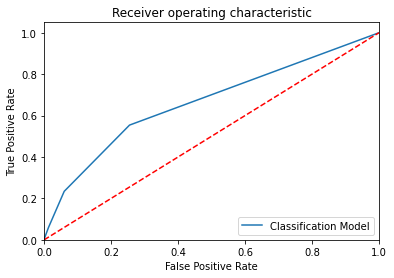

-----------------------------------------------------------------------------------------------------


In [51]:
# To build the 'Logistic Regression' model with random sampling (RandomizedSearchCV)

from sklearn.ensemble import ExtraTreesClassifier

# Create model object

ModeEXT = ExtraTreesClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=1000,criterion='gini')

# Fit the model

ModeEXT.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModeEXT.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelKNN.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModeEXT,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

Confusion matrix : 
 [[  18  845]
 [   8 8723]]
Outcome values : 
 18 845 8 8723
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.02      0.04       863
           0       0.91      1.00      0.95      8731

    accuracy                           0.91      9594
   macro avg       0.80      0.51      0.50      9594
weighted avg       0.89      0.91      0.87      9594

Accuracy : 91.1 %
Precision : 69.2 %
Recall : 2.1 %
F1 Score : 0.04
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 51.0 %
MCC : 0.11
roc_auc_score: 0.51


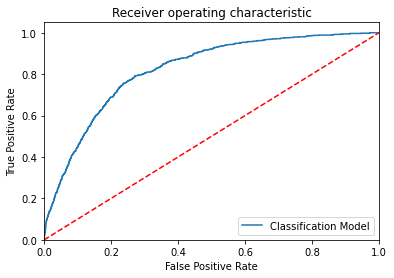

-----------------------------------------------------------------------------------------------------


In [52]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with GridSearchCV  

from sklearn.ensemble import ExtraTreesClassifier

ModeEX = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=10,
                               min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                               ccp_alpha=0.0, max_samples=None)
# Train the model with train data 

ModeEX.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModeEX.predict(x_test)
y_pred_prob = ModeEX.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModeEX.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModeEX,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------